In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

In [21]:
# Dataset laden

config_path = os.path.join("..", "data", "dogs-ranking-dataset.csv")
data = pd.read_csv(config_path)

In [22]:
data.head()

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


<Axes: xlabel='LONGEVITY(YEARS)', ylabel='popularity ranking'>

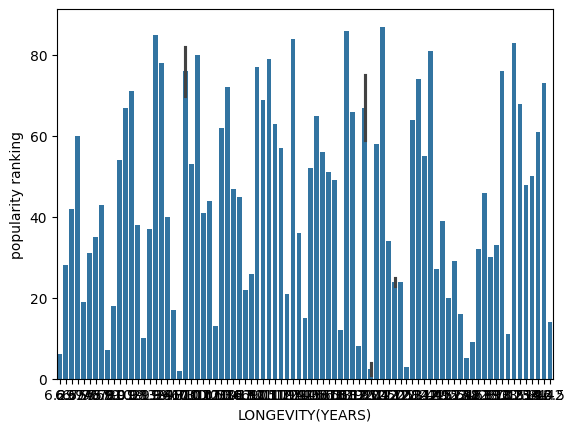

In [ ]:
# blöd

sns.barplot(
    x="LONGEVITY(YEARS)", 
    y="popularity ranking", 
    data=data
    )

<Axes: xlabel='$LIFETIME COST', ylabel='popularity ranking'>

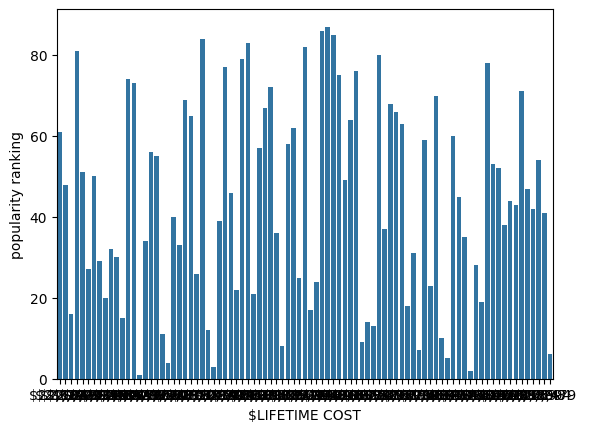

In [ ]:
sns.barplot(
    x="$LIFETIME COST", 
    y="popularity ranking", 
    data=data
    )


### was mach ich hier

<Axes: xlabel='INTELLIGENCE %', ylabel='popularity ranking'>

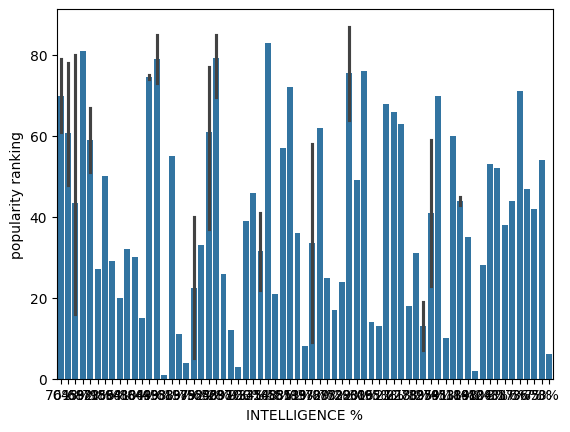

In [28]:
sns.barplot(
    x="INTELLIGENCE %", 
    y="popularity ranking", 
    data=data
    )

originaldatensatz vielleicht doch besser?

In [29]:
config_path = os.path.join("..", "data", "dog_breeds_traits.csv")
data2 = pd.read_csv(config_path)

In [30]:
data2.head()

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy
2,German Shepherd,large,5,4,5,4,4,10,Germany,herding
3,Beagle,medium,4,5,3,3,5,13,England,hound
4,Poodle (Standard),medium,3,5,5,2,2,14,Germany/France,non-sporting


<Axes: xlabel='breed', ylabel='lifespan'>

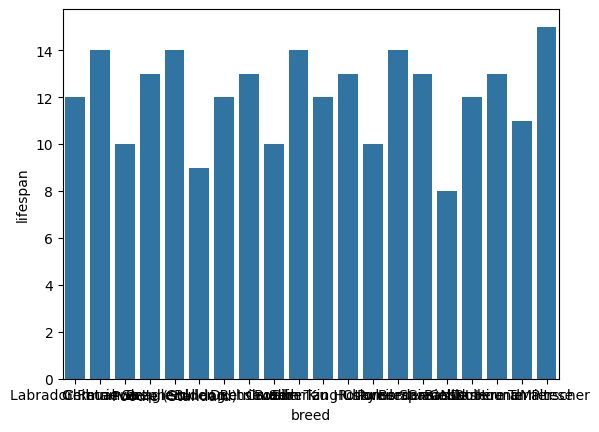

In [33]:
sns.barplot(
    x="breed", 
    y="lifespan", 
    data=data2
    )

<Axes: xlabel='breed', ylabel='lifespan'>

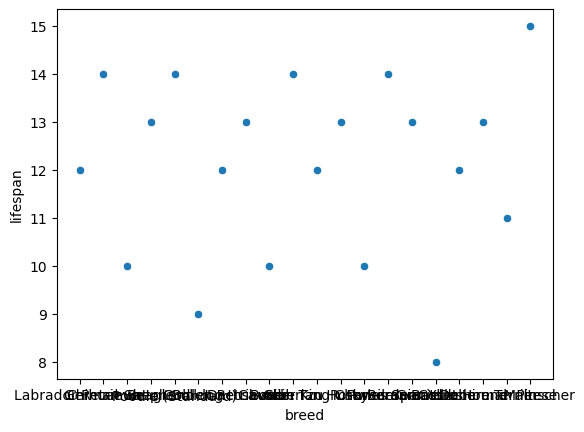

In [34]:
sns.scatterplot(
    x="breed", 
    y="lifespan", 
    data=data2
    )

In [ ]:
# laura dumbatz, ab ins Wochenende